# Aperture photometry

## 모듈 설치 및 버전 확인

아래 셀을 실행하면 이 노트북을 실행하는데 필요한 모듈을 설치하고 파이썬 및 관련 모듈의 버전을 확인할 수 있습니다.

### 모듈 버전 확인

아래 셀을 실행하면 이 노트북을 실행한 파이썬 및 관련 모듈의 버전을 확인할 수 있다.

In [1]:
import importlib, sys, subprocess
packages = "numpy, pandas, matplotlib, scipy, astropy, astroquery, photutils, ysfitsutilpy, ysphotutilpy, ccdproc, sep, aplpy, version_information" # required modules
pkgs = packages.split(", ")
for pkg in pkgs :
    if not importlib.util.find_spec(pkg):
        print(f"**** module {pkg} is being installed")
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', pkg, '-q'])
    else: 
        print(f"**** module {pkg} is installed")

%load_ext version_information
import time
now = time.strftime("%Y-%m-%d %H:%M:%S (%Z = GMT%z)")
print(f"This notebook was generated at {now} ")

vv = %version_information {packages}
for i, pkg in enumerate(vv.packages):
    print(f"{i} {pkg[0]:10s} {pkg[1]:s}")

**** module numpy is installed
**** module pandas is installed
**** module matplotlib is installed
**** module scipy is installed
**** module astropy is installed
**** module astroquery is installed
**** module photutils is installed
**** module ysfitsutilpy is installed
**** module ysphotutilpy is installed
**** module ccdproc is installed
**** module sep is installed
**** module aplpy is installed
**** module version_information is installed
This notebook was generated at 2024-12-10 00:39:16 (KST = GMT+0900) 
"Important:  Gaia archive will be intermittently unavailable due to scheduled maintenance on 10-12-2024 from 08:00 to 10:00 (CET)"
0 Python     3.12.7 64bit [GCC 11.2.0]
1 IPython    8.27.0
2 OS         Linux 6.8.0 49 generic x86_64 with glibc2.39
3 numpy      1.26.4
4 pandas     2.2.3
5 matplotlib 3.8.4
6 scipy      1.14.1
7 astropy    7.0.0
8 astroquery 0.4.7
9 photutils  1.12.0
10 ysfitsutilpy 0.2
11 ysphotutilpy 0.1.1
12 ccdproc    2.4.2
13 sep        1.2.1
14 aplpy      2.1

This notebook was generated at 2024-09-25 20:50:10 (KST = GMT+0900) 
0 Python     3.12.3 64bit [GCC 11.2.0]
1 IPython    8.25.0
2 OS         Linux 5.15.0 122 generic x86_64 with glibc2.31
3 numpy      1.26.4
4 pandas     2.2.2
5 matplotlib 3.8.4
6 scipy      1.13.1
7 astropy    6.1.0
8 astroquery 0.4.7
9 photutils  1.12.0
10 ysfitsutilpy 0.2
11 ysphotutilpy 0.1.1
12 ccdproc    2.4.2
13 aplpy      2.1.0
14 version_information 1.0.4

0 Python     3.12.3 64bit [GCC 11.2.0]
1 IPython    8.25.0
2 OS         Linux 5.15.0 119 generic x86_64 with glibc2.31
3 numpy      1.26.4
4 pandas     2.2.2
5 matplotlib 3.8.4
6 scipy      1.13.1
7 astropy    6.1.0
8 astroquery 0.4.7
9 photutils  1.12.0
10 ysfitsutilpy 0.2
11 ysphotutilpy 0.1.1
12 ccdproc    2.4.2
13 aplpy      2.1.0
14 version_information 1.0.4

### import modules

In [ ]:
#%%
from glob import glob
from pathlib import Path
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from astropy.io import fits
from astropy.wcs import WCS
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

import astropy.units as u

import ysfitsutilpy as yfu
import ysphotutilpy as ypu

import _astro_utilities
import _Python_utilities

from photutils.detection import DAOStarFinder
from astropy.stats import sigma_clipped_stats

from photutils.aperture import CircularAperture as CAp
from photutils.aperture import CircularAnnulus as CAn
from photutils.aperture import aperture_photometry as apphot

import warnings
warnings.filterwarnings('ignore')

In [3]:
#%%
#######################################################
BASEDIR = Path("/mnt/Rdata/ASTRO_data")  

PROJECDIR = BASEDIR / "C1-Variable"
TODODIR = PROJECDIR / "-_-_-_2016-_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2017-01_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2017-03_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2017-05_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2017-06_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2021-10_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2022-01_-_RiLA600_STX-16803_-_2bin"

PROJECDIR = BASEDIR / "C2-Asteroid"
TODODIR = PROJECDIR / "-_-_-_2022-_-_GSON300_STF-8300M_-_1bin"
TODODIR = PROJECDIR / "-_-_-_2022-_-_RiLA600_STX-16803_-_1bin"
TODODIR = PROJECDIR / "-_-_-_2022-_-_RiLA600_STX-16803_-_2bin"
TODODIR = PROJECDIR / "-_-_-_2023-_-_GSON300_STF-8300M_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2023-_-_RiLA600_STX-16803_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2023-_-_RiLA600_STX-16803_-_2bin"

# PROJECDIR = BASEDIR / "C3-EXO"
# TODODIR = PROJECDIR / "-_-_-_2024-05_-_GSON300_STF-8300M_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2024-05_-_RiLA600_STX-16803_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2024-06_-_GSON300_STF-8300M_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2024-06_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2024-09_-_GSON300_STF-8300M_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2024-09_-_RiLA600_ASI6200MMPro_-_2bin"

# PROJECDIR = BASEDIR / "C4-Spectra"
# TODODIR = PROJECDIR / "-_-_-_2024-05_TEC140_ASI183MMPro_-_1bin"

# PROJECDIR = BASEDIR / "C5-Test"
# TODODIR = PROJECDIR / "-_-_-_-_GSON300_STF-8300M_-_1bin"

DOINGDIRs = sorted(_Python_utilities.getFullnameListOfsubDirs(TODODIR))
print ("DOINGDIRs: ", format(DOINGDIRs))
print ("len(DOINGDIRs): ", format(len(DOINGDIRs)))

try : 
    BDFDIR = [x for x in DOINGDIRs if "CAL-BDF" in str(x)]
    print ("BDFDIR: ", format(BDFDIR))
    BDFDIR = Path(BDFDIR[0])    
except : 
    BDFDIR = TODODIR
    pass

DOINGDIRs = sorted([x for x in DOINGDIRs if "_LIGHT_" in str(x)])
# print ("DOINGDIRs: ", format(DOINGDIRs))
# print ("len(DOINGDIRs): ", format(len(DOINGDIRs)))

# filter_str = '127JOHANNA_LIGHT_-_2023-11-17_-_GSON300_STF-8300M_-_1bin'
# DOINGDIRs = [x for x in DOINGDIRs if filter_str in str(x)]
# remove = 'BIAS'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
# remove = 'DARK'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
# remove = 'FLAT'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
print ("DOINGDIRs: ", DOINGDIRs)
print ("len(DOINGDIRs): ", len(DOINGDIRs))
#######################################################

DOINGDIRs:  ['/mnt/Rdata/ASTRO_data/C2-Asteroid/-_-_-_2023-_-_GSON300_STF-8300M_-_1bin/-_CAL-BDF_-_2023_-_GSON300_STF-8300M_-_1bin/', '/mnt/Rdata/ASTRO_data/C2-Asteroid/-_-_-_2023-_-_GSON300_STF-8300M_-_1bin/120LACHESIS_LIGHT_-_2023-10-09_-_GSON300_STF-8300M_-_1bin/', '/mnt/Rdata/ASTRO_data/C2-Asteroid/-_-_-_2023-_-_GSON300_STF-8300M_-_1bin/120LACHESIS_LIGHT_-_2023-10-10_-_GSON300_STF-8300M_-_1bin/', '/mnt/Rdata/ASTRO_data/C2-Asteroid/-_-_-_2023-_-_GSON300_STF-8300M_-_1bin/120LACHESIS_LIGHT_-_2023-10-16_-_GSON300_STF-8300M_-_1bin/', '/mnt/Rdata/ASTRO_data/C2-Asteroid/-_-_-_2023-_-_GSON300_STF-8300M_-_1bin/120LACHESIS_LIGHT_-_2023-11-14_-_GSON300_STF-8300M_-_1bin/', '/mnt/Rdata/ASTRO_data/C2-Asteroid/-_-_-_2023-_-_GSON300_STF-8300M_-_1bin/1266TONE_LIGHT_-_2023-11-21_-_GSON300_STF-8300M_-_1bin/', '/mnt/Rdata/ASTRO_data/C2-Asteroid/-_-_-_2023-_-_GSON300_STF-8300M_-_1bin/127JOHANNA_LIGHT_-_2023-11-17_-_GSON300_STF-8300M_-_1bin/', '/mnt/Rdata/ASTRO_data/C2-Asteroid/-_-_-_2023-_-_GSON300_STF

In [4]:
#Returns magnitude from flux.
def mag_inst(flux, ferr):
    m_inst = -2.5 * np.log10(flux)
    merr   = 2.5/ np.log(10) * ferr / flux
    return m_inst, merr

def linf(x, a, b):
    return a + b*x

In [5]:

#####################################################################
# Observed location
LOCATION = dict(lon=127.005, lat=37.308889, elevation=101)
Suwon = EarthLocation(lon=127.005 * u.deg, 
                                 lat=37.308889 * u.deg, 
                                 height=101 * u.m)
observatory_code = "P64"

# Used for any `astropy.SkyCoord` object:
SKYC_KW = dict(unit=u.deg, frame='icrs')

#######################################################
# Initial guess of FWHM in pixel
FWHM_INIT = 6

# Photometry parameters
R_AP = 1.5*FWHM_INIT # Aperture radius
R_IN = 4*FWHM_INIT   # Inner radius of annulus
R_OUT = 6*FWHM_INIT  # Outer radius of annulus

Mag_Low = 11.5
Mag_High = 15

Mag_target = 12.5
Mag_delta = 2
ERR_Max = 0.5
###############
#######################################################

In [6]:
for DOINGDIR in DOINGDIRs[:1] :
    DOINGDIR = Path(DOINGDIR)
    print("DOINGDIR", DOINGDIR)

DOINGDIR /mnt/Rdata/ASTRO_data/C2-Asteroid/-_-_-_2023-_-_GSON300_STF-8300M_-_1bin/120LACHESIS_LIGHT_-_2023-10-09_-_GSON300_STF-8300M_-_1bin


In [7]:
DOINGDIR = Path(DOINGDIRs[0])
print("DOINGDIR", DOINGDIR)

# if "RiLA600_STX-16803" in str(DOINGDIR.parts[-2]) :
READINGDIR = DOINGDIR / _astro_utilities.reduced_nightsky_dir
# if "GSON300_STF-8300M_-_1bin" in str(DOINGDIR.parts[-2]) :
READINGDIR = DOINGDIR / _astro_utilities.reduced_dir

DIFFPRESULTDIR = DOINGDIR / f"{READINGDIR.parts[-1]}_DPhot_Mag{Mag_target}"
if not DIFFPRESULTDIR.exists():
    os.makedirs("{}".format(str(DIFFPRESULTDIR)))
    print("{} is created...".format(str(DIFFPRESULTDIR)))

summary = yfu.make_summary(READINGDIR/"*.fit*")
if summary is not None : 
    print("len(summary):", len(summary))
    #print("summary:", summary)
    #print(summary["file"][0])
    df_light = summary.loc[summary["IMAGETYP"] == "LIGHT"].copy()
    df_light = df_light.reset_index(drop=True)
    #print("df_light:\n{}".format(df_light))

DOINGDIR /mnt/Rdata/ASTRO_data/C2-Asteroid/-_-_-_2023-_-_GSON300_STF-8300M_-_1bin/120LACHESIS_LIGHT_-_2023-10-09_-_GSON300_STF-8300M_-_1bin
All 134 keywords (guessed from /mnt/Rdata/ASTRO_data/C2-Asteroid/-_-_-_2023-_-_GSON300_STF-8300M_-_1bin/120LACHESIS_LIGHT_-_2023-10-09_-_GSON300_STF-8300M_-_1bin/reduced/120LACHESIS_LIGHT_B_2023-10-09-17-22-53_60sec_GSON300_STF-8300M_0c_1bin.fit) will be loaded.
len(summary): 70


In [8]:
for _, row  in df_light.iterrows():
    fpath = Path(row["file"])
    hdul = fits.open(fpath)
    ccd = yfu.load_ccd(fpath)
    flt = hdul[0].header["filter"]

In [ ]:
fpath = Path(df_light["file"][0])
hdul = fits.open(fpath)
ccd = yfu.load_ccd(fpath)
flt = hdul[0].header["filter"]

SOLVE, ASTAP, LOCAL = _astro_utilities.checkPSolve(fpath)
print(SOLVE, ASTAP, LOCAL)

if SOLVE :
    wcs = WCS(hdul[0].header)
    # It is used as a rough estimate, so no need to be accurate:
    #PIX2ARCSEC = 0.62*u.arcsec
    if 'PIXSCALE' in hdul[0].header:
        PIX2ARCSEC = hdul[0].header['PIXSCALE']
    else : 
        PIX2ARCSEC = _astro_utilities.calPixScale(hdul[0].header['FOCALLEN'], 
                                        hdul[0].header['XPIXSZ'],
                                        hdul[0].header['XBINNING'])
        
    if hdul[0].header['CCDNAME'] == 'STF-8300M' :
        val_figsize = (12, 9)
        val_fraction = 0.035
        hdul[0].header["GAIN"] = 0.37,
        hdul[0].header["RDNOISE"] = 9.3

    if hdul[0].header['CCDNAME'] == 'STX-16803' :
        val_figsize=(10, 9)
        val_fraction = 0.0455
        hdul[0].header["GAIN"] = 1.27
        hdul[0].header["RDNOISE"] = 9.0    

    # It is used as a rough estimate, so no need to be accurate:
    PIX2ARCSEC = hdul[0].header["PIXSCALE"]
    rdnoise = hdul[0].header["RDNOISE"]
    gain    = hdul[0].header["GAIN"]

    # print(rdnoise, gain, PIX2ARCSEC)
    
    # D.2. Find the observation time and exposure time to set the obs time
    t_start = Time(hdul[0].header['DATE-OBS'], format='isot')
    t_expos = hdul[0].header['EXPTIME'] * u.s
    t_middle = t_start + t_expos / 2 # start time + 0.5 * exposure time
    #print(f"t_start: {t_start}, t_expos: {t_expos}, t_middle: {t_middle}")


True False True


In [10]:
# Get the radius of the smallest circle which encloses all the pixels
rad = yfu.fov_radius(header=hdul[0].header,
                    unit=u.deg)
print("rad: {}".format(rad))  # 시야각(FOV)으로 구한 반지름

cent_coord = yfu.center_radec(ccd_or_header=hdul[0].header, 
                                      center_of_image=True)
print("cent_coord: {}".format(cent_coord))

pos_sky = SkyCoord(cent_coord, unit='deg')
pos_pix = pos_sky.to_pixel(wcs=wcs)

print("pos_sky: {}".format(pos_sky))
print("pos_pix: {}".format(pos_pix))

rad: 0.3228245949898783 deg
cent_coord: <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (20.46244501, 15.58383289)>
pos_sky: <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (20.46244501, 15.58383289)>
pos_pix: (array(1675.49999999), array(1265.5))


# PanSTARRS1 목록

PanSTARRS1 목록의 별 중에서 비교측광에 사용할 별들을 가져오자.

In [11]:
ps1 = ypu.PanSTARRS1(cent_coord.ra, cent_coord.dec, radius=rad,
                        column_filters={"rmag":f"{Mag_target-Mag_delta}..{Mag_target+Mag_delta}",
                        "e_rmag":"<0.10", "nr":">5"}
                        )
PS1_stars_all = ps1.query()
print("type(PS1_stars_all) :", type(PS1_stars_all))
print("len(PS1_stars_all) :", len(PS1_stars_all))

df_stars_all = ps1.query()
df_stars_all = df_stars_all.to_pandas()

isnear = ypu.organize_ps1_and_isnear(
                    ps1, 
                    # header=ccd.header+ccd.wcs.to_header(), 
                    ccd.header+ccd.wcs.to_header(), 
                    # bezel=5*FWHM_INIT*PIX2ARCSEC.value,
                    # nearby_obj_minsep=5*FWHM_INIT*PIX2ARCSEC.value,
                    bezel=5*FWHM_INIT*PIX2ARCSEC,
                    nearby_obj_minsep=5*FWHM_INIT*PIX2ARCSEC,
                    group_crit_separation=6*FWHM_INIT
                )
df_stars = ps1.queried.to_pandas()
print("len(df_stars):", len(df_stars))
df_stars = df_stars.dropna(subset=["gmag", "rmag"])
print("len(df_stars):", len(df_stars))

NameError: name 'ypu' is not defined

In [ ]:
# print(df_stars_all.columns)
print(df_stars.columns)

Index(['_r', 'RAJ2000', 'DEJ2000', 'objID', 'cell', 'sky', 'f_objID', 'Qual',
       'e_RAJ2000', 'e_DEJ2000', '_tab1_10', 'Ns', 'Nd', 'Ng', 'Nr', 'Ni',
       'Nz', 'Ny', 'gPSFf', 'gmag', 'e_gmag', 'gmagStd', 'o_gmag', 'b_gmag',
       'B_gmag', 'gKmag', 'e_gKmag', 'gFlags', 'rPSFf', 'rmag', 'e_rmag',
       'rmagStd', 'o_rmag', 'b_rmag', 'B_rmag', 'rKmag', 'e_rKmag', 'rFlags',
       'iPSFf', 'imag', 'e_imag', 'imagStd', 'o_imag', 'b_imag', 'B_imag',
       'iKmag', 'e_iKmag', 'iFlags', 'zPSFf', 'zmag', 'e_zmag', 'zmagStd',
       'o_zmag', 'b_zmag', 'B_zmag', 'zKmag', 'e_zKmag', 'zFlags', 'yPSFf',
       'ymag', 'e_ymag', 'ymagStd', 'o_ymag', 'b_ymag', 'B_ymag', 'yKmag',
       'e_yKmag', 'yFlags', 'x', 'y', 'grcolor', 'e_grcolor', 'Bmag', 'e_Bmag',
       'Vmag', 'e_Vmag', 'Rmag', 'e_Rmag'],
      dtype='object')


# PS1에서 얻은 별의 목록

In [ ]:
df_stars["RAJ2000"].array

<NumpyExtensionArray>
[ 56.8700237, 56.82306576, 56.90910886,  56.9438237, 56.80189846, 56.89566723,
 57.00545071,  56.7169892, 56.87510671,  56.9397365,
 ...
 57.12725747, 57.59572887, 56.64883994, 57.41199053, 57.36009076, 57.29965792,
 57.21466177, 56.24054428, 57.54762889, 57.18652259]
Length: 106, dtype: float64

In [ ]:
pos_stars_all = np.array([df_stars_all["RAJ2000"].array, df_stars_all["DEJ2000"].array]).T
pos_stars_all = SkyCoord(pos_stars_all, **SKYC_KW).to_pixel(wcs)
pos_stars_all = np.transpose(pos_stars_all)
# pos_stars_all   # PS1 query 모든 별

pos_stars = np.array([df_stars["RAJ2000"].array, df_stars["DEJ2000"].array]).T
pos_stars = SkyCoord(pos_stars, **SKYC_KW).to_pixel(wcs)
pos_stars = np.transpose(pos_stars)
# pos_stars     # PS1 query 중 비교 측광에 사용될 별

ap_stars = CAp(positions=pos_stars, r=R_IN)
ap_stars_all = CAp(positions=pos_stars_all, r=R_IN)
#apert
an_stars = CAn(positions=pos_stars, r_in=R_IN, r_out=R_OUT)
an_stars_all = CAn(positions=pos_stars_all, r_in=R_IN, r_out=R_OUT)

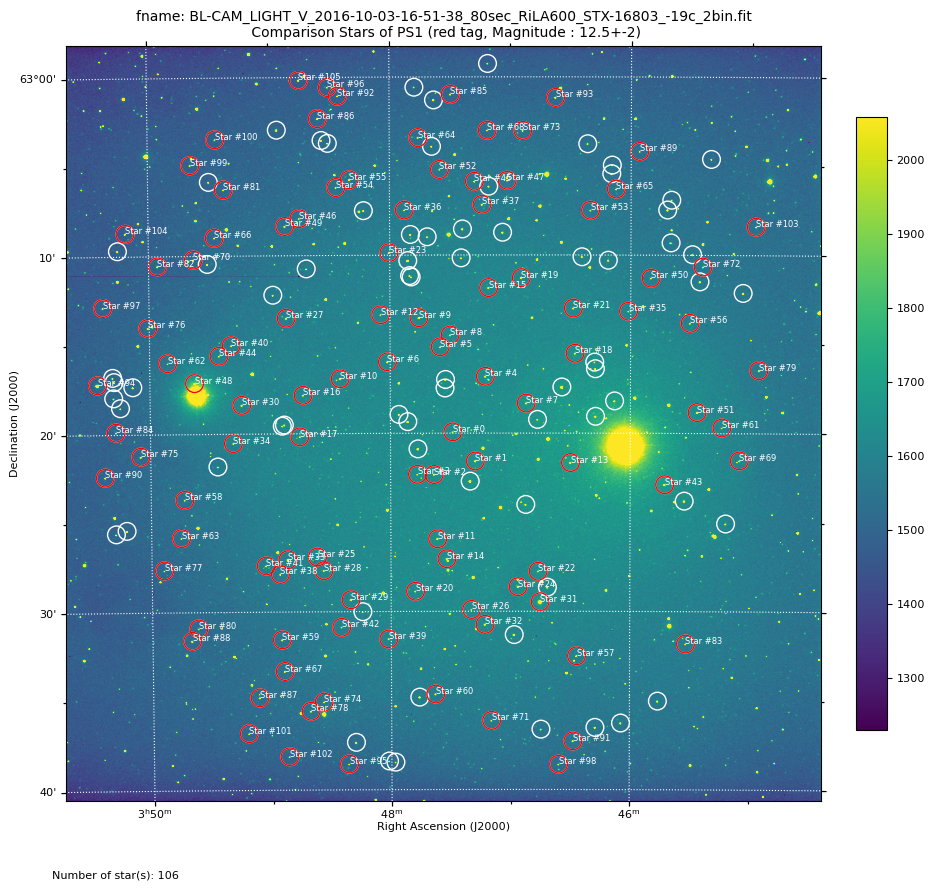

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=val_figsize,
                        subplot_kw={'projection': wcs},
                        sharex=False, sharey=False, gridspec_kw=None)

im = _astro_utilities.zimshow(axs, hdul[0].data, )
axs.coords.grid(True, color='white', ls=':')
axs.coords['ra'].set_axislabel('Right Ascension (J2000)', minpad=0.5, fontsize=8)
axs.coords['ra'].set_ticklabel_position('bl')
axs.coords['dec'].set_axislabel('Declination (J2000)', minpad=0.4, fontsize=8)
axs.coords['dec'].set_ticklabel_position('bl')
axs.coords['ra'].set_major_formatter('hh:mm')
axs.coords['dec'].set_major_formatter('dd:mm')
axs.coords['ra'].display_minor_ticks(True)
axs.coords['dec'].display_minor_ticks(True)
axs.coords['ra'].set_minor_frequency(2)
axs.coords['dec'].set_minor_frequency(2)
axs.tick_params(labelsize=8)

for i in range(len(pos_stars)):
    axs.text(pos_stars[i][0], pos_stars[i][1], f"Star #{str(i)}", fontsize=6, color='w')

ap_stars_all.plot(axs, color='w', lw=1)
ap_stars.plot(axs, color='r', lw=1)

axs.set_title(f"fname: {fpath.name}\n Comparison Stars of PS1 (red tag, Magnitude : {Mag_target}+-{Mag_delta})", fontsize=10,)

cbar = plt.colorbar(im, ax = axs, fraction=0.035, pad=0.04, )
cbar.ax.tick_params(labelsize=8)

axs.annotate(f'Number of star(s): {len(pos_stars)}', fontsize=8,
    xy=(0, 0), xytext=(-10, -50), va='top', ha='left',
    xycoords='axes fraction', textcoords='offset points')

plt.tight_layout()
plt.savefig(f"{DIFFPRESULTDIR/fpath.stem}_PS1_comparison.png")
# plt.show()
# plt.close()

grizy filter와 Johnson Cousins UBVRI filter

Pan-STARRS는 g, r, i, z, y 필터를 이용해 관측을 하였다.
우리는 Johnson Cousins wideband UBVRI filter가 사용하였기 때문에 측광 값을 알맞게 변환해 줄 필요가 있다. 
Tonry et. al.(2012)의 연구결과에 `따르면 B, V, R 필터와 g, r 필터 사이에는 다음과 같은 관계가 성립한다

$B-g = 0.213 + 0.587(g-r)$   $(\pm0.034)$

$V-r = 0.006 + 0.474(g-r)$   $(\pm0.012)$

$R-r = -0.138 -0.131(g-r)$   $(\pm0.015)$

이를 변형하여 다음과 같이 적을 수 있다.

$B = 0.213 + 1.587g-0.587r$   $(\pm0.034)$

$V = 0.006 + 0.474g + 0.526r$   $(\pm0.012)$

$R = -0.138 -0.131g + 1.131r$   $(\pm0.015)$

# 비교 측광 수행

목록에 있는 별들의 구경 측광을 수행해서 기기등급을 구해 보자.
그리고 별들을 출력해 보자.

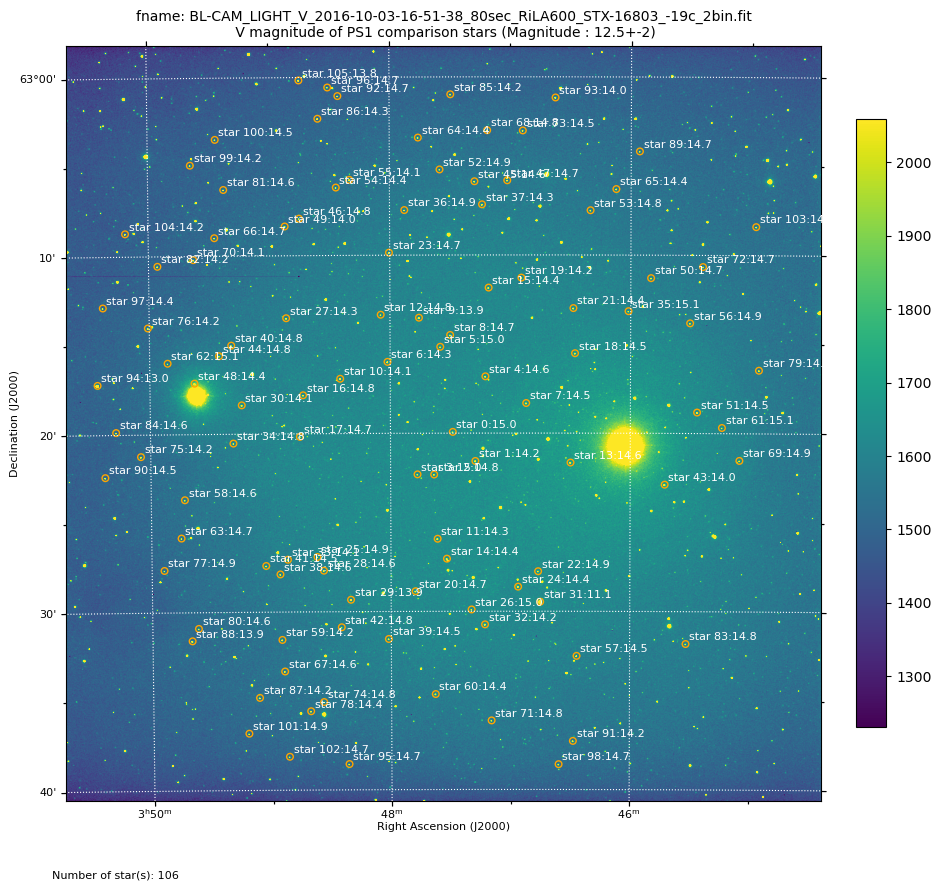

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=val_figsize,
                        subplot_kw={'projection': wcs},
                        sharex=False, sharey=False, gridspec_kw=None)

im = _astro_utilities.zimshow(axs, hdul[0].data, )

_phot_stars = []

for i, row in df_stars.iterrows():
    pos_star = SkyCoord(row["RAJ2000"], row["DEJ2000"],
                        **SKYC_KW).to_pixel(wcs)
    ap = CAp([pos_star[0], pos_star[1]],
            r=R_AP)
    an = CAn([pos_star[0], pos_star[1]],
            r_in=R_IN, r_out=R_OUT)
    _phot_star = ypu.apphot_annulus(hdul[0].data,
                                    ap, an,
                                    error=yfu.errormap(hdul[0].data))
    _phot_star[f"{flt}mag"] = row[f"{flt}mag"]
    _phot_star[f"e_{flt}mag"] = row[f"e_{flt}mag"]
    _phot_star["gmag"] = row["gmag"]
    _phot_star["e_gmag"] = row["e_gmag"]
    _phot_star["rmag"] = row["rmag"]
    _phot_star["e_rmag"] = row["e_rmag"]
    _phot_star["grcolor"] = row["grcolor"]
    _phot_star["e_grcolor"] = row["e_grcolor"]
    _phot_star["id"] = i
    _phot_star["objID"] = int(row["objID"])
    _phot_stars.append(_phot_star)
    axs.text(pos_star[0]+10, pos_star[1]+10, f"star {i}:{row[f'{flt}mag']:.01f}",
             fontsize=8, color="w")
    ap.plot(axs, color="orange")
    # an.plot(axs, color="w")

axs.coords.grid(True, color='white', ls=':')
axs.coords['ra'].set_axislabel('Right Ascension (J2000)', minpad=0.5, fontsize=8)
axs.coords['ra'].set_ticklabel_position('b')
axs.coords['dec'].set_axislabel('Declination (J2000)', minpad=0.4, fontsize=8)
axs.coords['dec'].set_ticklabel_position('l')
axs.coords['ra'].set_major_formatter('hh:mm')
axs.coords['dec'].set_major_formatter('dd:mm')

axs.coords['ra'].display_minor_ticks(True)
axs.coords['dec'].display_minor_ticks(True)
axs.coords['ra'].set_minor_frequency(2)
axs.coords['dec'].set_minor_frequency(2)
axs.tick_params(labelsize=8)

cbar = plt.colorbar(im, ax = axs, fraction=0.035, pad=0.04, )

axs.set_title(f"fname: {fpath.name}\n {flt} magnitude of PS1 comparison stars (Magnitude : {Mag_target}+-{Mag_delta})", fontsize=10,)
axs.annotate(f'Number of star(s): {len(pos_stars)}', fontsize=8,
                            xy=(0, 0), xytext=(-10, -50), va='top', ha='left',
                            xycoords='axes fraction', textcoords='offset points')

plt.tight_layout()
plt.savefig(f"{DIFFPRESULTDIR}/{fpath.stem}_PS1_magnitude.png")

# plt.show()
# plt.close()

In [ ]:
_phot_star

id    xcenter      ycenter   aperture_sum  aperture_sum_err         msky  \
0  105  629.14831  1953.193793  414396.307168        643.736209  1479.313839   

        ssky  nsky  nrej      aparea  ...  nbadpix       Vmag    e_Vmag  \
0  51.086071  2231    28  254.469005  ...        0  13.750808  0.012055   

      gmag  e_gmag     rmag  e_rmag  grcolor  e_grcolor               objID  
0  13.9075  0.0022  13.5982   0.001   0.3093   0.002417  183600571865303968  

[1 rows x 26 columns]

In [ ]:
df_phot_stars = pd.concat(_phot_stars)
# phot_stars = phot_stars.loc[phot_stars["objID"] != 110823405221754720].copy()  # star 15
# SEE THE LAST CELL IN THIS FILE FOR DESCRIPTION
# print(len(phot_stars))
# print(phot_stars.columns)
# print(phot_stars)


In [ ]:
df_phot_stars_na = df_phot_stars.dropna()
print(len(df_phot_stars_na))

df_phot_stars_na = df_phot_stars[df_phot_stars["merr"] < ERR_Max]
# phot_stars_na = phot_stars_na.set_index('id', drop=True)
df_phot_stars_na = df_phot_stars_na.reset_index(drop=True)
print(len(df_phot_stars_na))
# print(df_phot_stars_na)
df_phot_stars_na

106
106


id      xcenter      ycenter   aperture_sum  aperture_sum_err  \
0      0  1048.071971   999.709946  429227.537004        655.154590   
1      1  1109.322615   920.810383  444691.912068        666.852242   
2      2   997.548463   884.078264  429265.695147        655.183711   
3      3   952.423343   884.502902  427211.642628        653.614292   
4      4  1136.541302  1150.484626  434265.779596        658.988452   
..   ...          ...          ...            ...               ...   
101  101   496.304971   180.918150  396604.476302        629.765414   
102  102   606.384781   118.342436  398194.299665        631.026386   
103  103  1871.374536  1555.107894  409017.309210        639.544611   
104  104   158.878843  1535.655033  400933.683854        633.193244   
105  105   629.148310  1953.193793  414396.307168        643.736209   

            msky       ssky  nsky  nrej      aparea  ...  nbadpix       Vmag  \
0    1638.058962  45.101567  2246    14  254.469005  ...        0  14.972088   
1    1647.530469  46.247456  2237    25  254.469005  ...        0  14.162936   
2    1635.666835  46.399224  2244    18  254.469005  ...        0  14.808630   
3    1640.054833  45.493293  2246    12  254.469005  ...        0  15.024958   
4    1635.508706  46.830275  2223    34  254.469005  ...        0  14.606252   
..           ...        ...   ...   ...         ...  ...      ...        ...   
101  1509.721033  47.601446  2252     7  254.469005  ...        0  14.897853   
102  1505.702557  49.175957  2244    21  254.469005  ...        0  14.686372   
103  1539.940515  45.563055  2254     8  254.469005  ...        0  14.598963   
104  1480.094053  50.426358  2226    35  254.469005  ...        0  14.180376   
105  1479.313839  51.086071  2231    28  254.469005  ...        0  13.750808   

       e_Vmag     gmag  e_gmag     rmag  e_rmag  grcolor  e_grcolor  \
0    0.012221  15.5773  0.0028  14.4153  0.0040   1.1620   0.004883   
1    0.012042  14.4536  0.0021  13.8896  0.0002   0.5640   0.002110   
2    0.012299  15.1854  0.0032  14.4577  0.0047   0.7277   0.005686   
3    0.012241  15.6237  0.0038  14.4740  0.0034   1.1497   0.005099   
4    0.012168  14.9755  0.0031  14.2621  0.0029   0.7134   0.004245   
..        ...      ...     ...      ...     ...      ...        ...   
101  0.012136  15.5594  0.0021  14.2903  0.0032   1.2691   0.003828   
102  0.012434  15.0107  0.0025  14.3827  0.0064   0.6280   0.006871   
103  0.012093  14.9700  0.0018  14.2532  0.0026   0.7168   0.003162   
104  0.012104  14.5380  0.0021  13.8467  0.0026   0.6913   0.003342   
105  0.012055  13.9075  0.0022  13.5982  0.0010   0.3093   0.002417   

                  objID  
0    183990568700719328  
1    184030568230902016  
2    184040569091207136  
3    184040569438346880  
4    183930568019056960  
..                  ...  
101  184330572996526944  
102  184360572146523168  
103  183760562405858656  
104  183770575476224960  
105  183600571865303968  

[106 rows x 26 columns]

$M_f=m_f+(\text { effect of atmosphere })+(\text { effect of CCD }) \approx m_f-k_f^{\prime} X-k_f^{\prime \prime} X C+z_f+k_f C$

where
- $f$ : The filter ( $\mathrm{V}, \mathrm{B}, \mathrm{g}$ ', etc). In our case, $\mathrm{V}$.
- X: airmass (the simplest approximation is the secant of zenith angle, sec $Z$ ).
- $M_f$ : The standard apparent magnitude (or the true apparent magnitude) at filter $f$.
- $m_f$ : The instrumental magnitude ( $m_f=-2.5 \lg N$ ).
- $C$ : The true color index, e.g., $B-V$ or $r^{\prime}-i^{\prime}$. (Not necessarily include filter $f$, but it is better that the wavelength ranges of the selected two filters "contain" the range of $f$ for interpolation purpose. Also in many classical literatures, you will see the $C$ in this equation is the observed color, not the true color. This is just a matter of preference.)
- $k_f^{\prime}$ : The first order extinction coefficient at filter $f$.
- $k_f^{\prime \prime}$ : The second order extinction coefficient at filter $f$.
- $z_f$ : The zero point at filter $f$.
- $k_f$ : The system transform coefficient at filter $f$.
- Note: In the lecture note, lower- and upper-cased letters are used for the instrumental and true magnitudes, respectively (For example, $v, b, m_{g^{\prime}}$ are instrumental magnitudes of an object and $V, B$, and $M_{g^{\prime}}$ are true appparent magnitudes of it.).

In the simplest case,
$$  v=V+Z $$

for the zero point $Z$ (i.e., assume all the terms are constant). In our case, we calculate the zero point in this single image, and since the airmass $X$ is identical for every object in the FoV, this is quite a reasonalble guess. The color-term will be shown to be negligible (see below).

Note that putting $v\left(=m_f\right)$ to the LHS is to put it in the ordinate in the fitting process below.


{note}
The [weighted mean with variance weighting](https://en.wikipedia.org/wiki/Weighted_arithmetic_mean#Variance_weights) of $x_i$ is given as

$$ 
\bar{x} = \frac{\sum_i x_i / \sigma_i^2}{\sum_i 1 / \sigma_i^2} 
\quad;\quad
\sigma_{\bar{x}} = \frac{1}{\sqrt{\sum_{i=1}^{N} 1 / \sigma_i^2} } ~.
$$

In the simplest formalism, $Z=v-V$ can be calculated for multiple stars. The $Z$ and $d Z$ values can be calculated from this weighed mean, using $Z_i$ for the $\mathrm{i}$-th stars will be the zero point value. The error-bar of each can be roughly estimated as $d Z_i=\sqrt{d v^2+d V^2}$. However, if the error-bar of each star (i.e., the dv and $\mathrm{dV}$ values) are not correctly measured (many times it is the case), it is sometimes better to use simple sample standard deviation: np.std(Z_i, ddof $=1$ ). Normally many people use whichever is larger:
$$
d Z=\max \left(\frac{1}{\sqrt{\sum 1 / d Z_i^2}}, \frac{\text { np. std } \left.\left(\mathrm{Z}_{\mathrm{i}}, \text { ddof }=1\right)\right)}{\sqrt{N}}\right)
$$

In [ ]:
merr_total1 = np.sqrt((df_phot_stars_na["merr"])**2 + (df_phot_stars_na[f"e_{flt}mag"])**2)

# === Calculate zero point and errors
_xx = np.linspace(Mag_Low, Mag_High)
zeropt_med = np.median(df_phot_stars_na["mag"] - df_phot_stars_na[f"{flt}mag"])
zeropt_avg = np.average(df_phot_stars_na["mag"] - df_phot_stars_na[f"{flt}mag"],
                        weights=1/merr_total1**2)
dzeropt = np.max([1/np.sqrt(np.sum(1/(merr_total1)**2)),
                  np.std((df_phot_stars_na[f"e_{flt}mag"] - df_phot_stars_na["merr"]), ddof=1)/np.sqrt(len(df_phot_stars_na[f"{flt}mag"]))])
merr_total2 = np.sqrt(np.sqrt(merr_total1**2 + dzeropt**2))

# === Find fitting lines
# Search for the usage of scipy.optimize.curve_fit.
poptm, _ = curve_fit(linf, df_phot_stars_na[f"{flt}mag"],
                     df_phot_stars_na["mag"],
                     sigma= df_phot_stars_na["merr"], absolute_sigma=True)
poptc, _ = curve_fit(linf, df_phot_stars_na["grcolor"],
                     df_phot_stars_na["mag"] - df_phot_stars_na[f"{flt}mag"],
                     sigma=merr_total2, absolute_sigma=True)

In [ ]:
merr_total1
merr_total2
poptm
poptc

array([-25.71276019,   0.60149915])

## 그래프 추가중

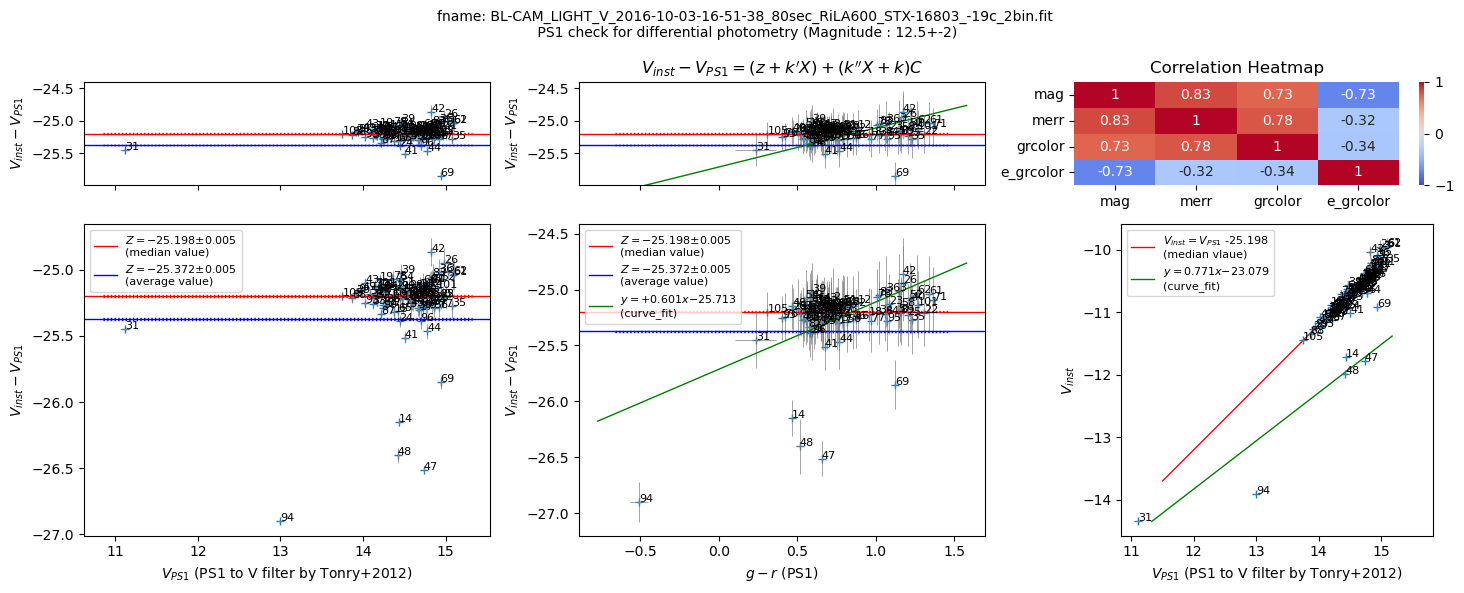

In [ ]:
import seaborn as sns

fig, axs = plt.subplots(2, 3, figsize=(15, 6), sharex=False, sharey=False,
        gridspec_kw={'height_ratios': [1, 3]})
errkw = dict(marker="", ls="", ecolor="gray", elinewidth=0.5)

def plot_common(ax, x, y, xerr, yerr, title="", xlabel="", ylabel="", ylim=None):
    ax.plot(x, y, '+')
    ax.errorbar(x, y, xerr=xerr, yerr=yerr, **errkw)
    ax.axhline(zeropt_med, color="r", lw=1, label=f"$Z = {{{zeropt_med:.3f}}} ± {{{dzeropt:.3f}}}$\n(median value)")
    ax.axhline(zeropt_avg, color="b", lw=1, label=f"$Z = {{{zeropt_avg:.3f}}} ± {{{dzeropt:.3f}}}$\n(average value)")
    ax.hlines([zeropt_med + dzeropt, zeropt_med - dzeropt, zeropt_avg + dzeropt, zeropt_avg - dzeropt],
            *ax.get_xlim(), color=["r","r","b","b"], lw=1, ls=":")
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel, ylim=ylim)
    # ax.legend(fontsize=8, loc='best')

# 상단 행
plot_common(axs[0, 0], df_phot_stars_na[f"{flt}mag"], df_phot_stars_na["mag"] - df_phot_stars_na[f"{flt}mag"],
            df_phot_stars_na[f"e_{flt}mag"], df_phot_stars_na["merr"],
            ylabel=f"${{{flt}}}_{{inst}} - {{{flt}}}_{{PS1}}$",
            ylim=(zeropt_med-0.8, zeropt_med+0.8))

plot_common(axs[0, 1], df_phot_stars_na["grcolor"], df_phot_stars_na["mag"] - df_phot_stars_na[f"{flt}mag"],
            df_phot_stars_na[f"e_grcolor"], merr_total2,
            title=f"${{{flt}}}_{{inst}} - {{{flt}}}_{{PS1}} = (z + k'X) + (k''X + k)C$",
            ylabel=f"${{{flt}}}_{{inst}} - {{{flt}}}_{{PS1}}$",
            ylim=(zeropt_med-0.8, zeropt_med+0.8))
axs[0, 1].plot(axs[0, 1].get_xlim(), linf(np.array(axs[0, 1].get_xlim()), *poptc),
            "g-", lw=1, label=f"$y = {{{poptc[1]:+.3f}}}x {{{poptc[0]:+.3f}}}$\n(curve_fit)")
# axs[0, 1].legend(fontsize=8, loc='best')

data = df_phot_stars_na[["mag", "merr", "grcolor", "e_grcolor"]]
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, ax=axs[0, 2])
axs[0, 2].set(title='Correlation Heatmap')

# 하단 행
plot_common(axs[1, 0], df_phot_stars_na[f"{flt}mag"], df_phot_stars_na["mag"] - df_phot_stars_na[f"{flt}mag"],
            df_phot_stars_na[f"e_{flt}mag"], df_phot_stars_na["merr"],
            xlabel=f"${{{flt}}}_{{PS1}}$ (PS1 to {flt} filter by Tonry+2012)",
            ylabel=f"${{{flt}}}_{{inst}} - {{{flt}}}_{{PS1}}$")

plot_common(axs[1, 1], df_phot_stars_na["grcolor"], df_phot_stars_na["mag"] - df_phot_stars_na[f"{flt}mag"],
            df_phot_stars_na[f"e_grcolor"], merr_total2,
            xlabel="$g - r$ (PS1)",
            ylabel=f"${{{flt}}}_{{inst}} - {{{flt}}}_{{PS1}}$")
axs[1, 0].legend(fontsize=8, loc='best')

axs[1, 1].plot(axs[1, 1].get_xlim(), linf(np.array(axs[1, 1].get_xlim()), *poptc),
            "g-", lw=1, label=f"$y = {{{poptc[1]:+.3f}}}x {{{poptc[0]:+.3f}}}$\n(curve_fit)")
axs[1, 1].legend(fontsize=8, loc='best')

axs[1, 2].plot(_xx, _xx + zeropt_med,
            label=f"${{{flt}}}_{{inst}} = {{{flt}}}_{{PS1}}$ {zeropt_med:+.03f}\n(median vlaue)",
            color="r", lw=1, ls="-")
axs[1, 2].plot(axs[1, 2].get_xlim(), linf(np.array(axs[1, 2].get_xlim()), *poptm),
            "g-", lw=1, label=f"$y = {{{poptm[1]:.3f}}}x {{{poptm[0]:+.3f}}}$\n(curve_fit)")
axs[1, 2].plot(df_phot_stars_na[f"{flt}mag"], df_phot_stars_na["mag"], '+')
axs[1, 2].errorbar(df_phot_stars_na[f"{flt}mag"],
            df_phot_stars_na["mag"],
            xerr=df_phot_stars_na[f"e_{flt}mag"],
            yerr=df_phot_stars_na["merr"],
            **errkw)
axs[1, 2].set(
            xlabel=f"${{{flt}}}_{{PS1}}$ (PS1 to {flt} filter by Tonry+2012)",
            ylabel =f"${{{flt}}}_{{inst}}$",
        )
axs[1, 2].legend(fontsize=8, loc='best')
axs[1, 2].axis('square')

# ID 텍스트 추가
for _, row in df_phot_stars_na.iterrows():
    for i in range(2):
        for j in range(2):
            axs[i, j].text(row[f"{flt}mag" if j == 0 else "grcolor"],
                        row["mag"] - row[f"{flt}mag"], int(row["id"]), fontsize=8, clip_on=True)
    axs[1, 2].text(row[f"{flt}mag"], row["mag"], int(row["id"]), fontsize=8, clip_on=True)

# x축 레이블 숨기기 (상단 행)
for ax in axs[0, :2]:
    ax.tick_params(labelbottom=False)

plt.suptitle(f"fname: {fpath.name}\n PS1 check for differential photometry (Magnitude : {Mag_target}+-{Mag_delta})", fontsize=10)
plt.tight_layout()
plt.savefig(f"{DIFFPRESULTDIR}/{fpath.stem}_standardization_extended.png")

plt.show()
# plt.close()

# DAOStar finder

In [ ]:
FWHM = FWHM_INIT
avg, med, std = sigma_clipped_stats(hdul[0].data)  # by default, 3-sigma 5-iteration.
thresh = 5. * std

DAOfind = DAOStarFinder(
                        fwhm = FWHM,
                        threshold=thresh,   # In reality, FWHM must be measured a priori using, e.g., ``ginga``
                        # sharplo=0.2, sharphi=1.0,   # default values 0.2 and 1.0
                        # roundlo=-1.0, roundhi=1.0,  # default values -1 and +1
                        # sigma_radius=1.5,           # default values 1.5
                        # ratio=1.0,                  # 1.0: circular gaussian
                        exclude_border=True         # To exclude sources near edges
                        )

DAOfound = DAOfind(hdul[0].data)
if len(DAOfound) > 2000 :
    from photutils import detect_threshold
    thresh_snr = detect_threshold(data=hdul[0].data, nsigma=3,)
    print('type(thresh_snr) :', type(thresh_snr))
    print('thresh_snr.shape :', thresh_snr.shape)
    print('detect_threshold', thresh_snr)
    thresh = thresh_snr[0][0]

    DAOfind = DAOStarFinder(
                        fwhm = FWHM,
                        threshold=thresh,   # In reality, FWHM must be measured a priori using, e.g., ``ginga``
                        # sharplo=0.2, sharphi=1.0,   # default values 0.2 and 1.0
                        # roundlo=-1.0, roundhi=1.0,  # default values -1 and +1
                        # sigma_radius=1.5,           # default values 1.5
                        # ratio=1.0,                  # 1.0: circular gaussian
                        exclude_border=True         # To exclude sources near edges
                        )
    DAOfound = DAOfind(hdul[0].data)

print("len(DAOfound) :",len(DAOfound))
print(DAOfound.colnames)

DAOfound.write(f"{DIFFPRESULTDIR/fpath.stem}_DAOStarfinder_fwhm_{FWHM}.csv",
                            overwrite = True,
                            format='ascii.fast_csv')
df_DAO = DAOfound.to_pandas()
print(type(df_DAO))
df_DAO

pos = np.transpose((DAOfound['xcentroid'], DAOfound['ycentroid']))
apert = CAp(pos, r=R_AP)
annul = CAn(positions=pos, r_in= R_IN, r_out=R_OUT)

len(DAOfound) : 1320
['id', 'xcentroid', 'ycentroid', 'sharpness', 'roundness1', 'roundness2', 'npix', 'sky', 'peak', 'flux', 'mag']
<class 'pandas.core.frame.DataFrame'>


확인해 보자.

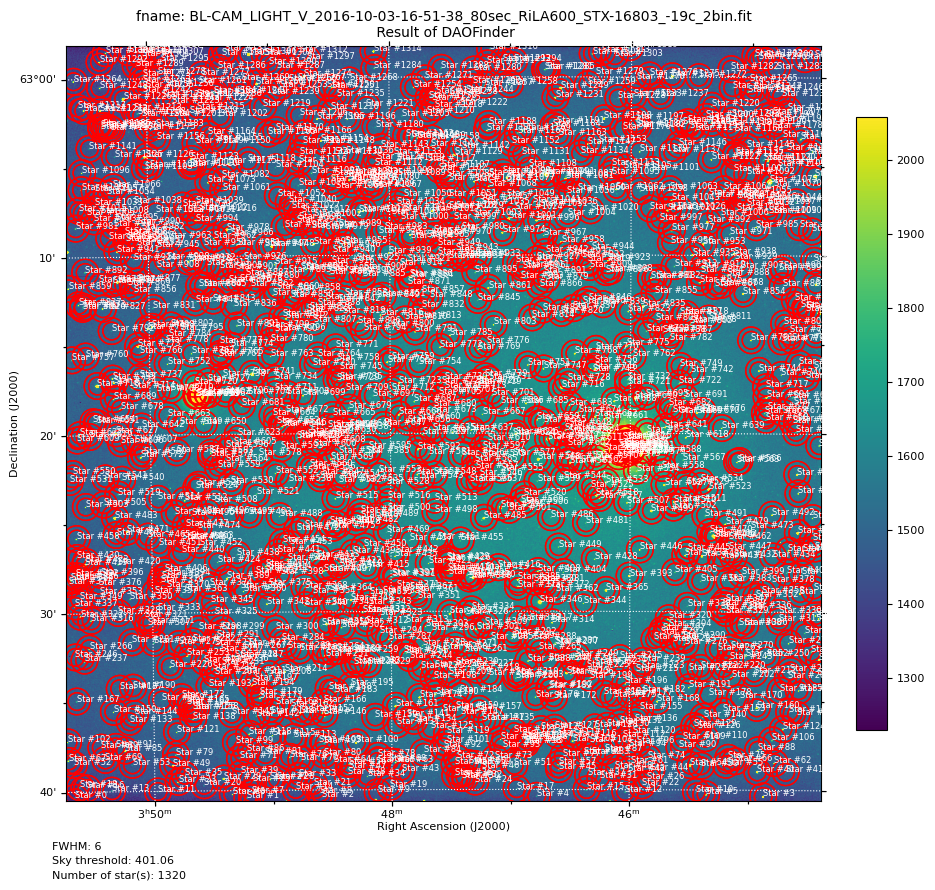

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=val_figsize,
                        subplot_kw={'projection': wcs},
                        sharex=False, sharey=False, gridspec_kw=None)

im = _astro_utilities.zimshow(axs, hdul[0].data, )
axs.set_title('World coordinate system', fontsize=9)
axs.coords.grid(True, color='white', ls=':')
axs.coords['ra'].set_axislabel('Right Ascension (J2000)', minpad=0.5, fontsize=8)
axs.coords['ra'].set_ticklabel_position('bl')
axs.coords['dec'].set_axislabel('Declination (J2000)', minpad=0.4, fontsize=8)
axs.coords['dec'].set_ticklabel_position('bl')
axs.coords['ra'].set_major_formatter('hh:mm')
axs.coords['dec'].set_major_formatter('dd:mm')
axs.coords['ra'].display_minor_ticks(True)
axs.coords['dec'].display_minor_ticks(True)
axs.coords['ra'].set_minor_frequency(2)
axs.coords['dec'].set_minor_frequency(2)
axs.tick_params(labelsize=8)

annul.plot(axs, color="r")
for i in range(len(pos)):
    axs.text(pos[i][0], pos[i][1], f"Star #{str(i)}", fontsize=6, color='w')

annul.plot(axs, color="r")

cbar = plt.colorbar(im, ax = axs, fraction=0.035, pad=0.04, )
cbar.ax.tick_params(labelsize=8)

axs.set_title(f"fname: {fpath.name}\n Result of DAOFinder", fontsize=10,)

axs.annotate(f'FWHM: {FWHM}', fontsize=8,
    xy=(0, 0), xytext=(-10, -30), va='top', ha='left',
    xycoords='axes fraction', textcoords='offset points')

axs.annotate(f'Sky threshold: {thresh:.02f}', fontsize=8,
    xy=(0, 0), xytext=(-10, -40), va='top', ha='left',
    xycoords='axes fraction', textcoords='offset points')

axs.annotate(f'Number of star(s): {len(DAOfound)}', fontsize=8,
    xy=(0, 0), xytext=(-10, -50), va='top', ha='left',
    xycoords='axes fraction', textcoords='offset points')

plt.tight_layout()
plt.savefig(f"{DIFFPRESULTDIR}/{fpath.stem}_DAOStarfinder_fwhm_{FWHM}.png")

# plt.show()
# plt.close()

# PS1과 DAOfound 목록 비교

In [ ]:
apphot_result = apphot(hdul[0].data, apert, method='center')
print(type(apphot_result))
# df_apphot = pd.DataFrame()
# apphot_result
df_apphot = apphot_result.to_pandas()
print(type(df_apphot))
df_apphot

ap_area  = apert.area
ap_area

# since our `annul` has many elements,
mask_apert = (apert.to_mask(method='center'))
mask_annul = (annul.to_mask(method='center'))

mag_ann  = np.zeros(len(apphot_result))
merr_ann = np.zeros(len(apphot_result))

<class 'astropy.table.table.QTable'>
<class 'pandas.core.frame.DataFrame'>


# 기기등급 구하기

# 구경측광 하기

In [ ]:
for i in range(len(apphot_result)):
    annul_weighted = mask_annul[i].multiply(hdul[0].data)
    sky_non0   = np.nonzero(annul_weighted)
    sky_pixel  = annul_weighted[sky_non0]

    msky, sky_std, nsky, nrej = _astro_utilities.sky_fit(sky_pixel, method='mode',
                                                        mode_option='sex')


    flux_star = apphot_result['aperture_sum'][i] - msky * ap_area  # total - sky

    flux_err  = np.sqrt(apphot_result['aperture_sum'][i] * gain    # Poissonian (star + sky)
                        + ap_area * rdnoise**2 # Gaussian
                        + (ap_area * (gain * sky_std))**2 / nsky )

    mag_ann[i], merr_ann[i] = mag_inst(flux_star, flux_err)
    df_apphot.at[i, 'msky'] = msky
    df_apphot.at[i, 'sky_std'] = sky_std
    df_apphot.at[i, 'nsky'] = nsky
    df_apphot.at[i, 'nrej'] = nrej
    df_apphot.at[i, 'flux_star'] = flux_star
    df_apphot.at[i, 'flux_err'] = flux_err
    df_apphot.at[i, 'mag_ann'] = mag_ann[i]
    df_apphot.at[i, 'merr_ann'] = merr_ann[i]

df_apphot['filename'] = fpath.stem
df_apphot['t_start'] = t_start
df_apphot['t_expos'] = t_expos
df_apphot['t_middle'] = t_middle
df_apphot['filter'] = flt
df_apphot["zeropt_med"] = zeropt_med
df_apphot["zeropt_avg"] = zeropt_avg
df_apphot["e_zeropt"] = dzeropt

df_apphot[f"{flt}_magnitude"] = df_apphot["mag_ann"] - df_apphot["zeropt_med"]

df_apphot['filename'] = fpath.stem
df_apphot['t_start'] = t_start
df_apphot['t_expos'] = t_expos
df_apphot['t_middle'] = t_middle
df_apphot['filter'] = flt
df_apphot["zeropt_med"] = zeropt_med
df_apphot["zeropt_avg"] = zeropt_avg
df_apphot["e_zeropt"] = dzeropt

df_apphot[f"{flt}_magnitude"] = df_apphot["mag_ann"] - df_apphot["zeropt_med"]

sky_coord = wcs.pixel_to_world(df_apphot['xcenter'], df_apphot['ycenter'])
sky_coord
print(type(sky_coord))

# df_apphot["RA2000"] = sky_coord.ra
# df_apphot["RA2000"]
df_RADEC = pd.DataFrame({"RAJ2000": sky_coord.ra.degree, "DEJ2000": sky_coord.dec.degree})
# df_RADEC
#type(df_RADEC["RA2000"][0])
df_apphot = pd.concat([df_apphot, df_RADEC], axis=1,)

df_apphot.to_csv(f"{DIFFPRESULTDIR}/{fpath.stem}_result_photometry.csv")

/tmp/ipykernel_630327/2869360460.py:3: RuntimeWarning: invalid value encountered in log10
  m_inst = -2.5 * np.log10(flux)
/tmp/ipykernel_630327/2869360460.py:3: RuntimeWarning: invalid value encountered in log10
  m_inst = -2.5 * np.log10(flux)
/tmp/ipykernel_630327/2869360460.py:3: RuntimeWarning: invalid value encountered in log10
  m_inst = -2.5 * np.log10(flux)
/tmp/ipykernel_630327/2869360460.py:3: RuntimeWarning: invalid value encountered in log10
  m_inst = -2.5 * np.log10(flux)
/tmp/ipykernel_630327/2869360460.py:3: RuntimeWarning: invalid value encountered in log10
  m_inst = -2.5 * np.log10(flux)
/tmp/ipykernel_630327/2869360460.py:3: RuntimeWarning: invalid value encountered in log10
  m_inst = -2.5 * np.log10(flux)
/tmp/ipykernel_630327/2869360460.py:3: RuntimeWarning: invalid value encountered in log10
  m_inst = -2.5 * np.log10(flux)
/tmp/ipykernel_630327/2869360460.py:3: RuntimeWarning: invalid value encountered in log10
  m_inst = -2.5 * np.log10(flux)
/tmp/ipykernel_6

<class 'astropy.coordinates.sky_coordinate.SkyCoord'>
<class 'astropy.coordinates.sky_coordinate.SkyCoord'>


In [ ]:
df_apphot_sub = df_apphot.dropna()
print(len(df_apphot_sub))
df_apphot_sub = df_apphot_sub.loc[(df_apphot_sub["merr_ann"] < ERR_Max)]
print(len(df_apphot_sub))
df_apphot_sub

1190
1112


id      xcenter      ycenter   aperture_sum         msky    sky_std  \
3        4  1890.176764    10.742493  393918.048828  1438.022567  51.640823   
5        6  1735.496904    16.124101  389035.381714  1461.525573  53.527264   
6        7   451.129663    16.957295  363749.328125  1417.423454  53.755256   
7        8   503.604898    19.280023  371989.146973  1427.136033  54.739478   
9       10   844.478448    22.091344  373481.170776  1459.633932  55.495307   
...    ...          ...          ...            ...          ...        ...   
1309  1310   106.695119  2026.944944  367362.585693  1381.179719  57.464998   
1310  1311   199.901464  2027.971190  382368.927002  1397.641036  58.256517   
1313  1314  1453.098543  2030.970444  387313.291626  1464.896883  54.313095   
1314  1315   833.110262  2032.660334  421702.756592  1460.221247  53.067712   
1315  1316   430.596396  2035.581699  367219.139282  1419.192462  53.468063   

        nsky  nrej     flux_star    flux_err  ...                 t_middle  \
3     1401.0   6.0  27985.877238  848.346649  ...  2016-10-03T16:52:18.000   
5     1551.0  11.0  17122.423391  841.203854  ...  2016-10-03T16:52:18.000   
6     1577.0   3.0   3058.992132  820.944335  ...  2016-10-03T16:52:18.000   
7     1638.0  14.0   8827.260811  827.100929  ...  2016-10-03T16:52:18.000   
9     1750.0   8.0   2049.576649  823.854170  ...  2016-10-03T16:52:18.000   
...      ...   ...           ...         ...  ...                      ...   
1309  1604.0  74.0  15895.157002  837.963524  ...  2016-10-03T16:52:18.000   
1310  1582.0  63.0  26712.603316  854.563151  ...  2016-10-03T16:52:18.000   
1313  1489.0  63.0  14542.439570  848.183178  ...  2016-10-03T16:52:18.000   
1314  1464.0  41.0  50121.708922  870.104779  ...  2016-10-03T16:52:18.000   
1315  1391.0  34.0   6078.645710  837.636138  ...  2016-10-03T16:52:18.000   

      filter zeropt_med zeropt_avg  e_zeropt V_magnitude    RAJ2000  \
3          V -25.197671 -25.371709  0.005198   14.080324  56.217050   
5          V -25.197671 -25.371709  0.005198   14.613758  56.337391   
6          V -25.197671 -25.371709  0.005198   16.483725  57.335971   
7          V -25.197671 -25.371709  0.005198   15.333106  57.295173   
9          V -25.197671 -25.371709  0.005198   16.918511  57.030217   
...      ...        ...        ...       ...         ...        ...   
1309       V -25.197671 -25.371709  0.005198   14.694509  57.582434   
1310       V -25.197671 -25.371709  0.005198   14.130880  57.511738   
1313       V -25.197671 -25.371709  0.005198   14.791078  56.560844   
1314       V -25.197671 -25.371709  0.005198   13.447606  57.031363   
1315       V -25.197671 -25.371709  0.005198   15.738154  57.336705   

        DEJ2000    RAJ2000    DEJ2000  
3     63.672322  56.217050  63.672322  
5     63.670826  56.337391  63.670826  
6     63.669913  57.335971  63.669913  
7     63.669263  57.295173  63.669263  
9     63.669018  57.030217  63.669018  
...         ...        ...        ...  
1309  62.975515  57.582434  62.975515  
1310  62.975546  57.511738  62.975546  
1313  62.976500  56.560844  62.976500  
1314  62.975674  57.031363  62.975674  
1315  62.973732  57.336705  62.973732  

[1112 rows x 25 columns]

In [ ]:
df_apphot_sub.columns

Index(['id', 'xcenter', 'ycenter', 'aperture_sum', 'msky', 'sky_std', 'nsky',
       'nrej', 'flux_star', 'flux_err', 'mag_ann', 'merr_ann', 'filename',
       't_start', 't_expos', 't_middle', 'filter', 'zeropt_med', 'zeropt_avg',
       'e_zeropt', 'V_magnitude', 'RAJ2000', 'DEJ2000', 'RAJ2000', 'DEJ2000'],
      dtype='object')

In [ ]:
print(len(df_apphot_sub))

1112


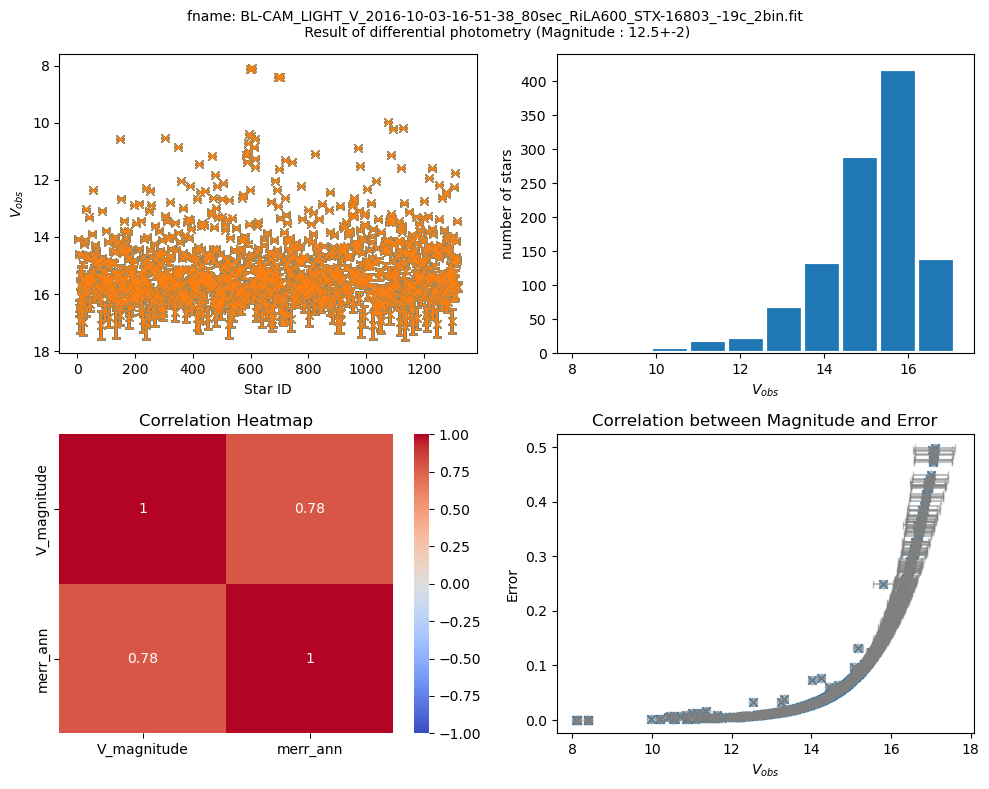

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8),
                        sharex=False, sharey=False, gridspec_kw=None)

for idx, row in df_apphot_sub.iterrows():
    im0 = axs[0, 0].errorbar(df_apphot_sub["id"],
                df_apphot_sub[f"{flt}_magnitude"], yerr=df_apphot_sub["merr_ann"],
                marker='x',
                ls='none',
                #ms=10,
                capsize=3)

axs[0, 0].invert_yaxis()
axs[0, 0].set(
    xlabel='Star ID',
    ylabel=f"${{{flt}}}_{{obs}}$"
    )

style = {'edgecolor': 'white', 'linewidth': 3}
im1 = axs[0, 1].hist(df_apphot_sub[f"{flt}_magnitude"],
            **style)
axs[0, 1].set(
    xlabel=f"${{{flt}}}_{{obs}}$",
    ylabel="number of stars"
    )

# 상관관계 계산
data =  df_apphot_sub[[f"{flt}_magnitude", "merr_ann"]]
corr = data.corr()

# 히트맵 그리기
im2 = sns.heatmap(corr, annot=True, cmap='coolwarm',
                    vmin=-1, vmax=1, center=0, ax = axs[1, 0])
axs[1, 0].set(
    title = 'Correlation Heatmap',
    )

axs[1, 1].scatter(df_apphot_sub[f"{flt}_magnitude"], df_apphot_sub["merr_ann"], marker='x',)
axs[1, 1].errorbar(x=df_apphot_sub[f"{flt}_magnitude"], y=df_apphot_sub["merr_ann"],
            yerr=None, xerr=df_apphot_sub["merr_ann"], fmt="o", color="gray", capsize=3, alpha=0.5)
axs[1, 1].set(
    title = "Correlation between Magnitude and Error",
    xlabel=f"${{{flt}}}_{{obs}}$",
    ylabel="Error",
    )

plt.suptitle(f"fname: {fpath.name}\n Result of differential photometry (Magnitude : {Mag_target}+-{Mag_delta})", fontsize=10,)

plt.tight_layout()
plt.savefig(f"{DIFFPRESULTDIR}_Result_of_differential_photometry.png")

plt.show()
# plt.close()